### Problem statement :

There is a multiclass problem in which you need to Predict the wine quality (0-10)


### Importing Required libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,f1_score 
from IPython.display import Image 
import seaborn as sns


### Loading the data set

In [2]:
df=pd.read_csv("D:\\python_datascience\\machine_learning\\decision_tree\\Decision Trees \\Decision Trees\\winequality_red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data set consists following Input variables :
1 - fixed acidity 
2 - volatile acidity  
3 - citric acid  
4 - residual sugar 
5 - chlorides  
6 - free sulfur dioxide
7 - total sulfur dioxide 
8 - density  
9 - pH   
10 - sulphates   
11 - alcohol

and the Output variable/target gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

### Checking shape of data 

In [3]:
df.shape

(1599, 12)

### Basic information of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Statistical Summary

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Checking class imbalance 

In [6]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### From above output it is showing that quality is target variable which is multiclass as it has 6 classes as follows :

class categories 
- 5
- 6
- 7
- 4
- 8
- 3

681 enteries of class 5 , 638 enteries of class 6 and so on 


there is a class imbalance so we handle it using over sampling 

### Handle imbalance problem using over sampling technique name  SMOTE  install imblearn

In [8]:
#pip install imblearn

In [9]:
from imblearn.over_sampling import SMOTE
#smote: Synthetic Minority Oversampling Technique.

In [11]:
## oversampling 
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X,y)


In [12]:
from collections import Counter
Counter(y_smote)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [13]:
## checking shape of data after over sampling 
print(x_smote.shape)
print(y_smote.shape)

(4086, 6)
(4086,)


### Now Dividing  this smote data(over sampled data)  into training and test data

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.25, random_state= 42)


### getting shape of train and test data

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3064, 6)
(3064,)
(1022, 6)
(1022,)


In [16]:
clf=DecisionTreeClassifier() ## TAKING default paramter values as max_depth =5 , split criteria=ginni index etc
clf.fit(x_train,y_train)

DecisionTreeClassifier()

### Predictions 

In [34]:
y_pred=clf.predict(x_test)

### ACCURACY :

In [18]:
acc=accuracy_score(y_test,y_pred)
acc

0.7485322896281801

### Confusion matrix :

In [19]:
c=confusion_matrix(y_test,y_pred)
c

array([[154,   4,   5,   2,   0,   0],
       [  6, 136,  12,  10,   1,   0],
       [  6,  15, 110,  44,   8,   2],
       [  4,  11,  36, 104,  24,  14],
       [  1,   6,   8,  16, 109,   7],
       [  0,   1,   1,   5,   8, 152]], dtype=int64)

### F1 Score :

In [20]:
f1=f1_score(y_test,y_pred,average="weighted")
f1

0.7453199609283856

In [21]:
## roc basically used for binary class

### Tree visualisation

In [22]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name


['fixed acidity', 'citric acid', 'residual sugar', 'density', 'pH', 'alcohol']

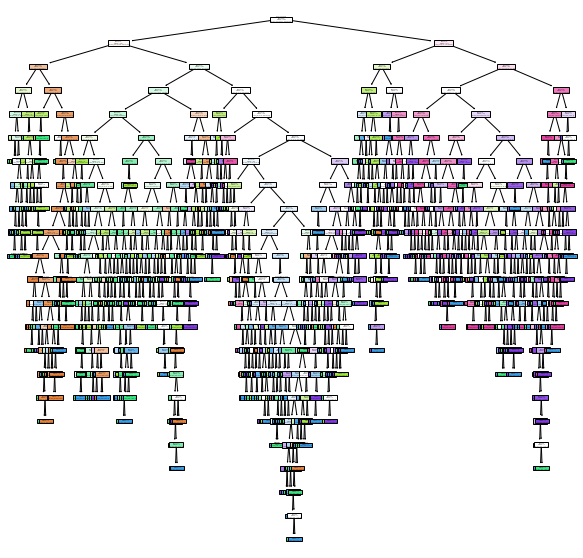

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize = (10,10))
x = tree.plot_tree(clf,feature_names = feature_name,filled=True)
plt.show();


In [24]:
fig.savefig("wine_decision_tree.pdf")

### Do Hyper parameter tuning

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.

It does a exhaustive generation of combination of different parameters passed.

Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [25]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [26]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1) 

In [27]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [28]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [29]:
grid_search.best_score_

0.7549030270074315

In [32]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =29, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=29, splitter='random')

In [33]:
clf.score(x_test,y_test)

0.735812133072407

Note : we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.

 
